In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import statistics as stat



In [2]:
clean_csv = "Resources/merged_data/clean_merge2.csv"
clean_df = pd.read_csv(clean_csv, encoding="ISO-8859-1", low_memory=False, dtype={"FIPS": str})

In [3]:
clean_df.head()

,FIPS,Year,RegionName,State,Industry,Annual Average Establishment Count,Annual Average Employment,Annual Total Wages,Annual Average Pay,Avg_Price
0,01001,2009,Autauga County,AL,Federal Government,15,100,4476122,44873,144408.333333
1,01001,2009,Autauga County,AL,State Government,16,519,18717293,36093,144408.333333
2,01001,2009,Autauga County,AL,Local Government,32,1995,67539151,33857,144408.333333
3,01001,2009,Autauga County,AL,Goods-producing,159,1842,91335147,49580,144408.333333
4,01001,2009,Autauga County,AL,Natural resources and mining,23,197,5506289,28022,144408.333333


In [4]:
County_avg = clean_df.groupby(['Year','FIPS']).mean().round(2)
pd.options.display.float_format = "{:.2f}".format
County_avg=County_avg.reset_index()
County_avg.head()

,Year,FIPS,Annual Average Establishment Count,Annual Average Employment,Annual Total Wages,Annual Average Pay,Avg_Price
0,2009,01001,113.00,1293.07,39774029.20,34673.67,144408.33
1,2009,01003,692.27,7297.27,219815516.00,34206.53,176875.00
2,2009,01009,99.33,1009.47,28995484.07,30891.00,128516.67
3,2009,01017,76.73,872.20,26394027.00,32101.40,55033.33
4,2009,01019,49.87,563.27,15989819.20,30002.73,97183.33


In [5]:
industry_avg = clean_df.groupby(['Year','Industry']).mean().round(2)
pd.options.display.float_format = "{:.2f}".format
industry_avg=industry_avg.reset_index()


industry_avg_PP=pd.pivot_table(industry_avg, values=['Avg_Price','Annual Average Pay'], index= ['Year'], columns=['Industry'])
industry_avg_Price=pd.pivot_table(industry_avg, values='Avg_Price', index= ['Year'], columns=['Industry'])
industry_avg_Pay=pd.pivot_table(industry_avg, values='Annual Average Pay', index= ['Year'], columns=['Industry'])
industry_avg.head()

,Year,Industry,Annual Average Establishment Count,Annual Average Employment,Annual Total Wages,Annual Average Pay,Avg_Price
0,2009,Construction,380.00,2754.45,136713552.64,37645.55,144771.40
1,2009,Education and health services,407.15,8774.70,381804579.41,33249.48,144771.40
2,2009,Federal Government,26.17,1335.73,91326714.60,51291.37,144771.40
3,2009,Financial activities,387.36,3625.43,257433293.32,39219.03,144771.40
4,2009,Goods-producing,591.48,9015.16,479314002.38,42440.13,144771.40


In [6]:
state_avg = clean_df.groupby(['Year','State']).mean().round(2)
state_avg=state_avg.reset_index()
state_avg.head()

,Year,State,Annual Average Establishment Count,Annual Average Employment,Annual Total Wages,Annual Average Pay,Avg_Price
0,2009,AK,253.27,3348.92,151742488.70,42869.80,262782.29
1,2009,AL,374.34,5815.22,230556501.98,35654.57,114701.15
2,2009,AR,278.30,3806.70,138684820.22,32514.56,97308.64
3,2009,AZ,1257.60,19468.09,824014561.65,35434.84,162539.10
4,2009,CA,3155.24,32692.94,1657783953.03,42173.96,297611.15


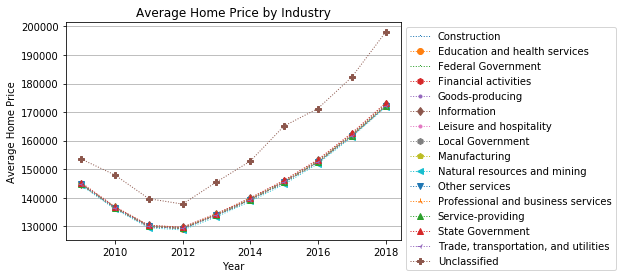

In [7]:
# Plot Avg Price and Avg Annual Pay by Industry
valid_markers = ([item[0] for item in mpl.markers.MarkerStyle.markers.items() if 
item[1] is not 'nothing' and not item[1].startswith('tick') 
and not item[1].startswith('caret') and not item[1].endswith('line')])

# use fillable markers

markers = np.random.choice(valid_markers, industry_avg_Price.shape[1])


plot1 = industry_avg_Price.plot(kind='line', ls=':', lw=1)
for i, line in enumerate(plot1.get_lines()):
     line.set_marker(markers[i])
    
plot1.legend(plot1.get_lines(), industry_avg_Price.columns, bbox_to_anchor=(1, 1))
plot1.set_ylabel('Average Home Price')
plot1.set_xlabel('Year')
plot1.set_title('Average Home Price by Industry')
plot1.yaxis.grid(True)

# Save the Figure
plot1.autoscale(enable=True, axis='x')
plt.savefig("Charts/Images/Price_by_Industry.png")
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

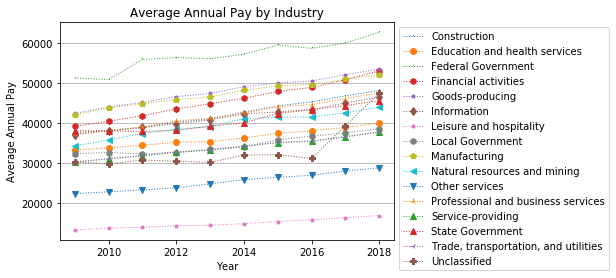

In [22]:
plot2 = industry_avg_Pay.plot(kind='line', ls=':', lw=1)
for i, line in enumerate(plot2.get_lines()):
    line.set_marker(markers[i])

plot2.legend(plot2.get_lines(), industry_avg_Pay.columns, bbox_to_anchor=(1, 1))
plot2.set_ylabel('Average Annual Pay')
plot2.set_xlabel('Year')
plot2.set_title('Average Annual Pay by Industry')
plot2.yaxis.grid(True)

# Save the Figure
plot2.autoscale(enable=True, axis='x')
plot2.savefig("Charts/Images/Pay_by_Industry.png")
plt.show()

In [9]:
# for i, ax in enumerate(axes.flatten()):
#     print(i,ax)
#axes.flatten()
# for x in zip(industry_avg_Pay.groupby(industry_avg_Pay.index), axes.flatten()):
#     print(x)
    
df = industry_avg_Pay.groupby(industry_avg_Pay.index)
df.head(100)

Industry,Construction,Education and health services,Federal Government,Financial activities,Goods-producing,Information,Leisure and hospitality,Local Government,Manufacturing,Natural resources and mining,Other services,Professional and business services,Service-providing,State Government,"Trade, transportation, and utilities",Unclassified
Year,,,,,,,,,,,,,,,,
2009,37645.55,33249.48,51291.37,39219.03,42440.13,37149.78,13320.87,32394.38,42048.91,34357.06,22406.11,37231.27,30289.61,38113.99,30323.38,30328.14
2010,38137.17,33818.65,50857.25,40466.16,44033.81,38095.94,13761.10,32643.92,43786.42,35775.83,22822.19,38141.38,31051.07,38088.26,31112.51,29803.51
2011,38950.37,34483.24,55923.52,41885.73,45206.47,38922.91,13974.75,32314.04,44896.60,37399.59,23339.34,39027.66,31795.29,37919.61,31994.40,30787.86
2012,40260.36,35197.67,56361.35,43529.17,46612.41,39865.99,14348.71,32642.71,45882.33,38499.64,23799.68,40549.63,32719.80,38184.58,32854.23,30488.09
2013,41047.84,35402.76,56098.72,44844.94,47405.09,40806.52,14502.16,33413.72,46496.68,39139.22,24828.42,41200.05,33221.49,39217.01,33362.19,30197.68
2014,42764.08,36277.23,57191.35,46218.53,49119.17,42292.88,14877.30,34030.68,48227.26,41106.32,25871.26,42536.76,34159.57,40090.73,34319.21,32007.56
2015,44294.77,37489.88,59500.71,47901.17,50027.11,42797.73,15417.85,35866.33,49254.22,41491.04,26468.30,44077.28,35113.34,42396.43,35161.35,32117.36
2016,45291.03,38041.75,58680.38,48934.17,50522.07,43396.31,15823.03,36745.08,49620.46,41542.33,26964.07,44615.37,35535.39,43383.48,35457.12,31176.61
2017,46807.57,38938.22,60016.47,50843.22,52075.00,45042.54,16374.05,37537.52,50950.50,42542.76,28033.61,46118.62,36642.01,44363.66,36563.90,39337.06


In [10]:
# max_avg_price = []
# for year in County_avg.Year.unique():
#     max_avg_price.append(County_avg[County_avg['Year']==year].Avg_Price.max())
# max_price=stat.mean(max_avg_price)

# mid_avg_price = []
# for year in County_avg.Year.unique():
#     mid_avg_price.append(County_avg[County_avg['Year']==year].Avg_Price.median())
# mid_price=stat.mean(mid_avg_price)
# mid_price
# # max_avg_price

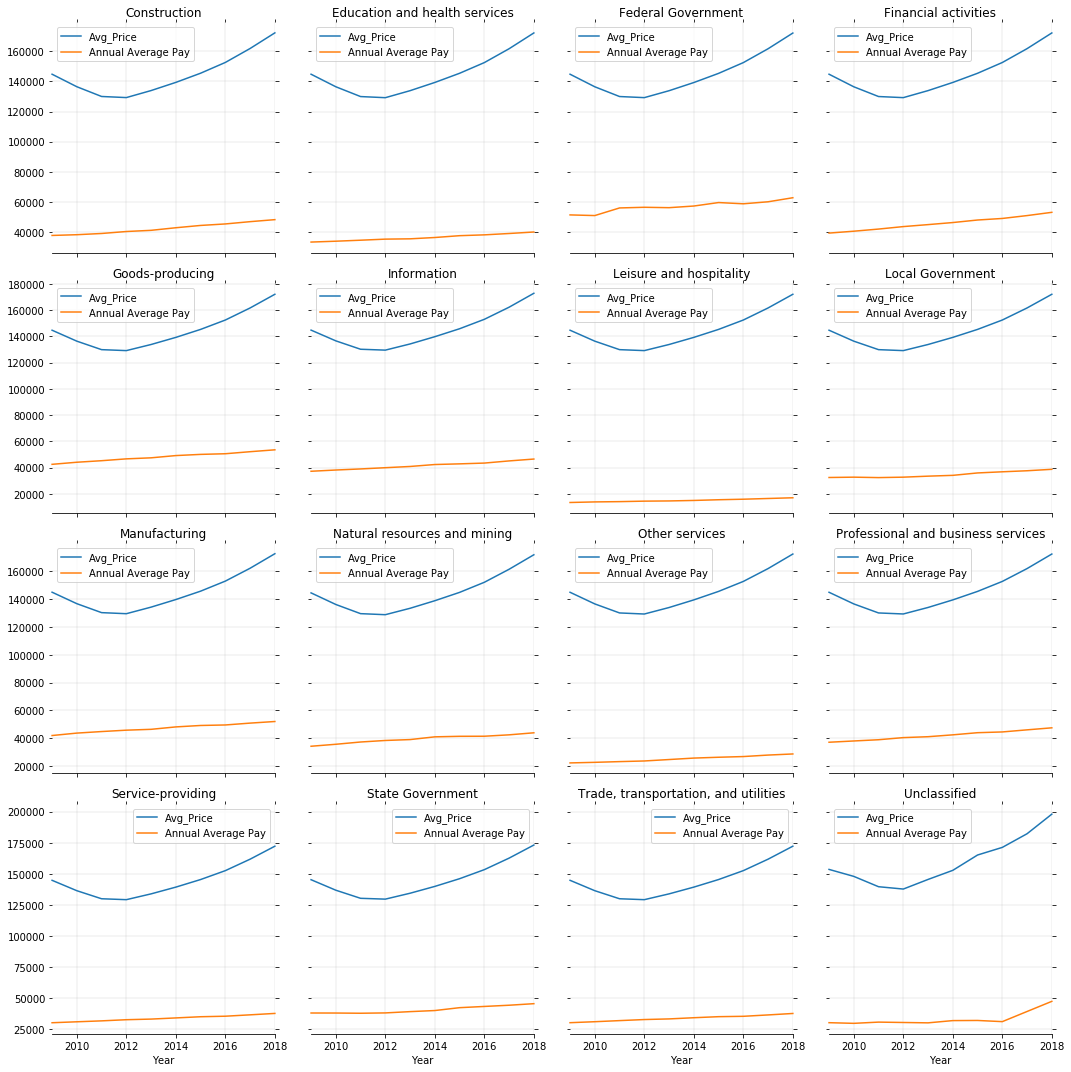

In [11]:

fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True, sharey='row', figsize=(15,15))
axes_list = [item for sublist in axes for item in sublist] 

for industry, selection in industry_avg.groupby("Industry"):
    ax = axes_list.pop(0)
    selection.plot(x='Year', y='Avg_Price', ax=ax, clip_on=False)
    selection.plot(x='Year', y='Annual Average Pay', ax=ax, clip_on=False)
    ax.set_title(industry)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.grid(linewidth=0.25)
    ax.set_xlim((2009, 2018))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

for ax in axes_list:
    ax.remove()

plt.tight_layout()
plt.savefig("Charts/Images/Price_Pay_by_Industry.png")
plt.show()

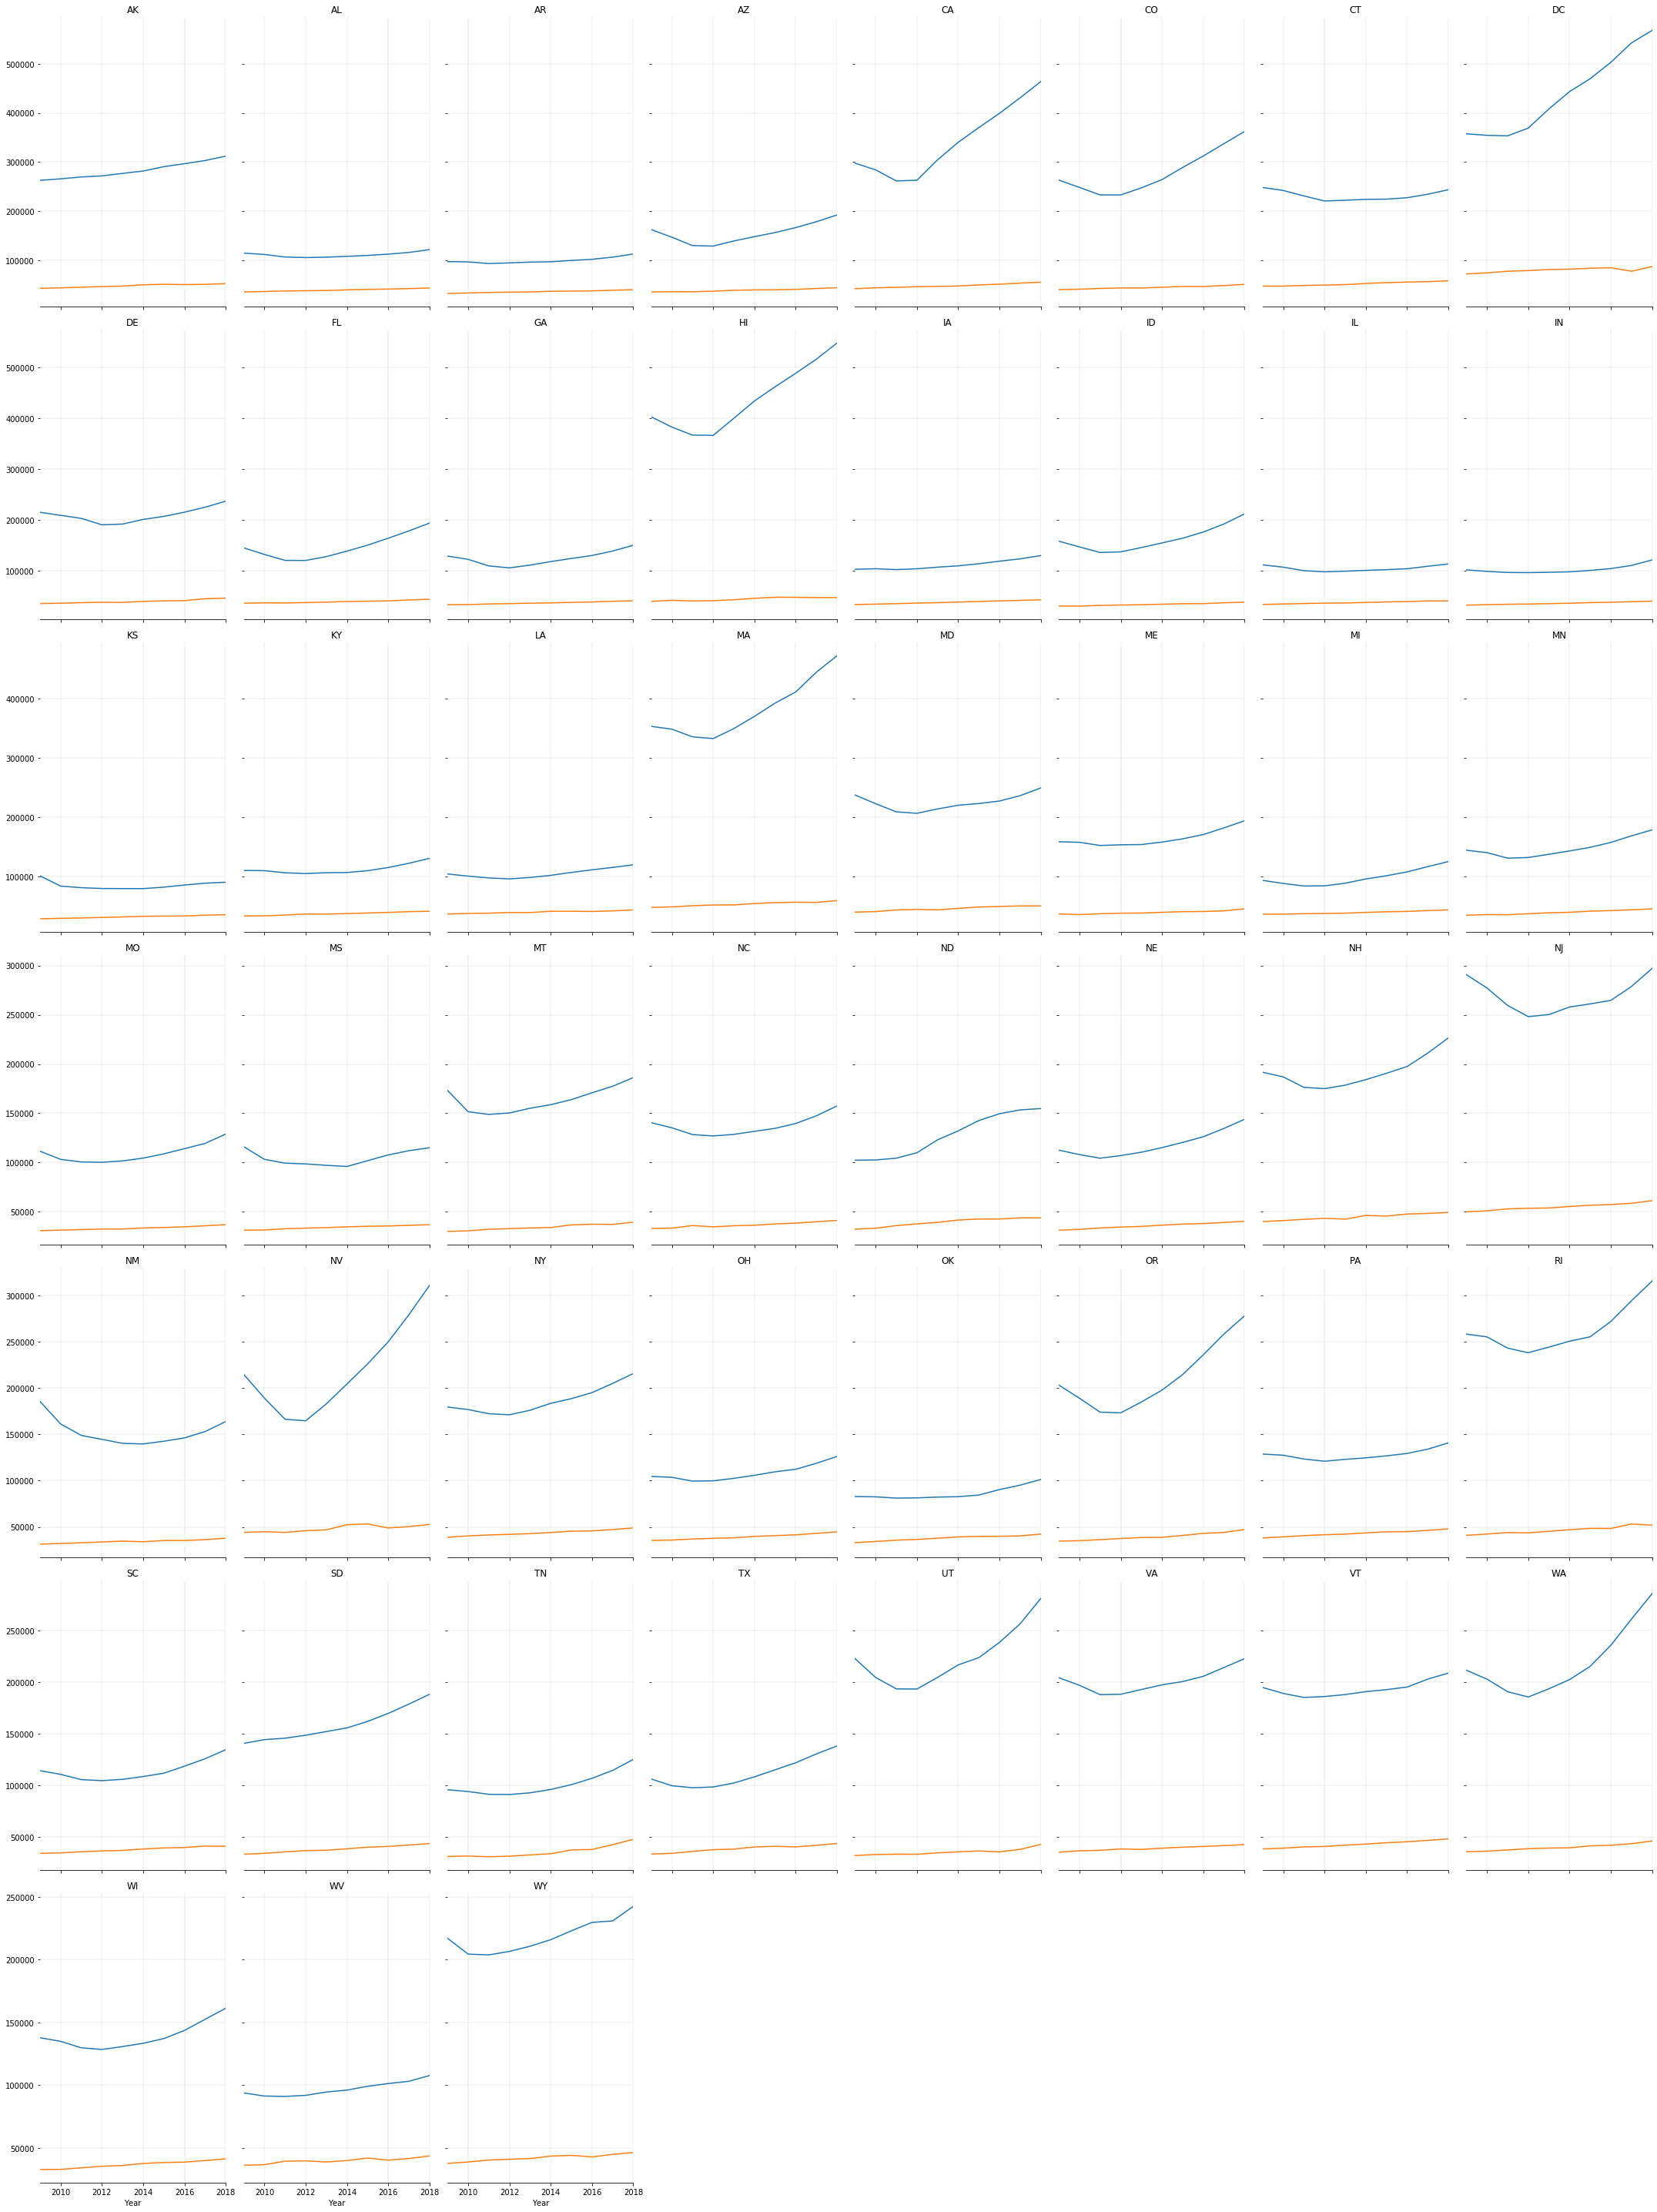

In [12]:
fig, axes = plt.subplots(nrows=7, ncols=8, sharex=True, sharey='row', figsize=(30,40))
axes_list = [item for sublist in axes for item in sublist] 

for state, selection in state_avg.groupby("State"):
    try:
        ax = axes_list.pop(0)
    except:
        pass
    selection.plot(x='Year', y='Avg_Price',label = 'Avg_Price', legend=False, ax=ax)
    selection.plot(x='Year', y='Annual Average Pay',label = 'Annual Average Pay', legend=False, ax=ax)
    ax.set_title(state)
#     ax.tick_params(
#         which='both',
#         bottom='off',
#         left='off',
#         right='off',
#         top='off'
#     )
    ax.grid(linewidth=0.25)
    ax.set_xlim((2009, 2018))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

for ax in axes_list:
    ax.remove()
#plt.legend(lines[:2],['Average Home Price','Annual Average Pay'])
plt.tight_layout()
plt.savefig("Charts/Images/Price_Pay_by_State.png")
plt.show()

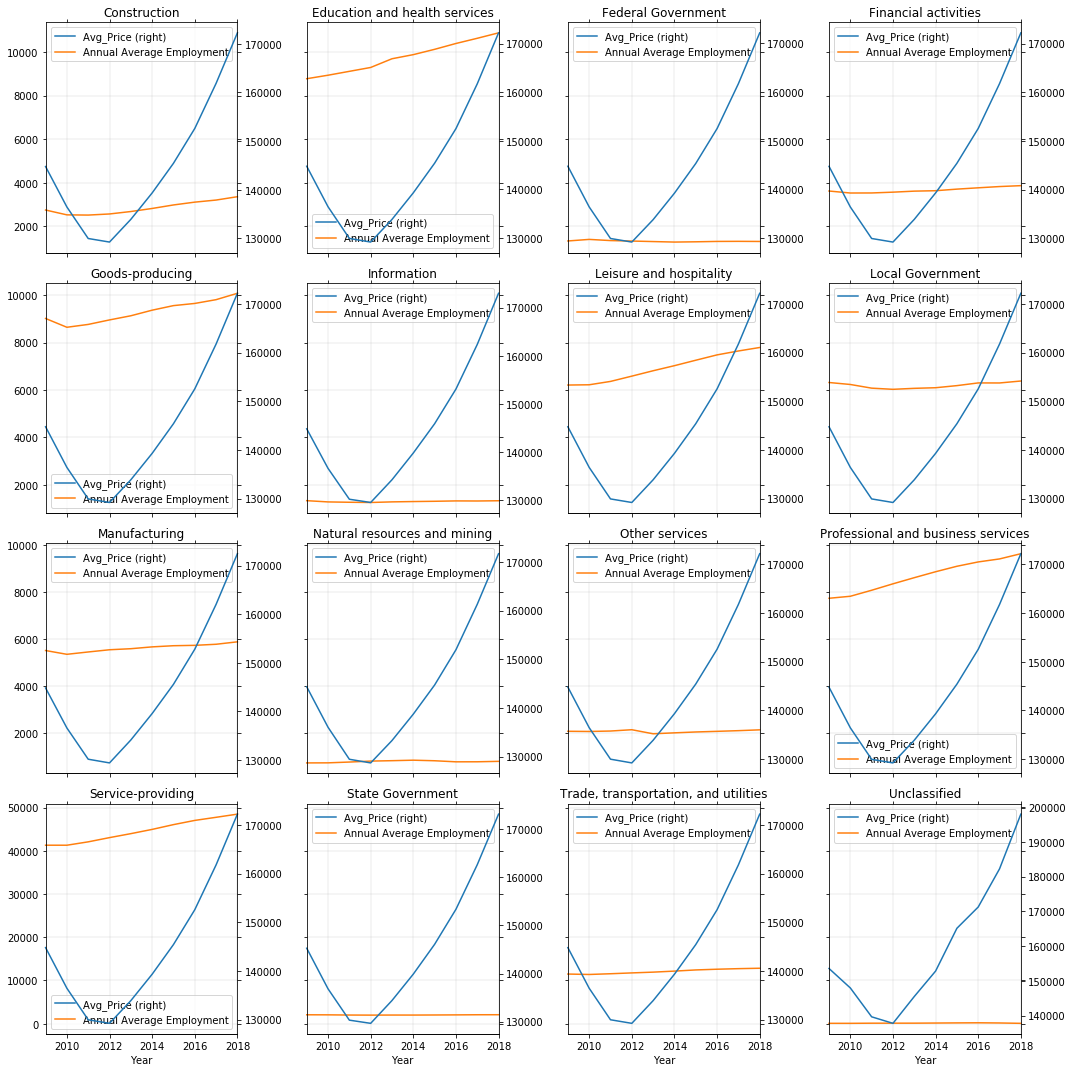

In [13]:
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True, sharey='row', figsize=(15,15))
axes_list = [item for sublist in axes for item in sublist] 

for industry, selection in industry_avg.groupby("Industry"):
    ax = axes_list.pop(0)
    selection.plot(x='Year', y='Avg_Price', ax=ax, clip_on=False, secondary_y=True)
    selection.plot(x='Year', y='Annual Average Employment', ax=ax, clip_on=False)
    ax.set_title(industry)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.grid(linewidth=0.25)
    ax.set_xlim((2009, 2018))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

for ax in axes_list:
    ax.remove()

plt.tight_layout()
plt.savefig("Charts/Images/Price_Emp_by_Industry.png")
plt.show()

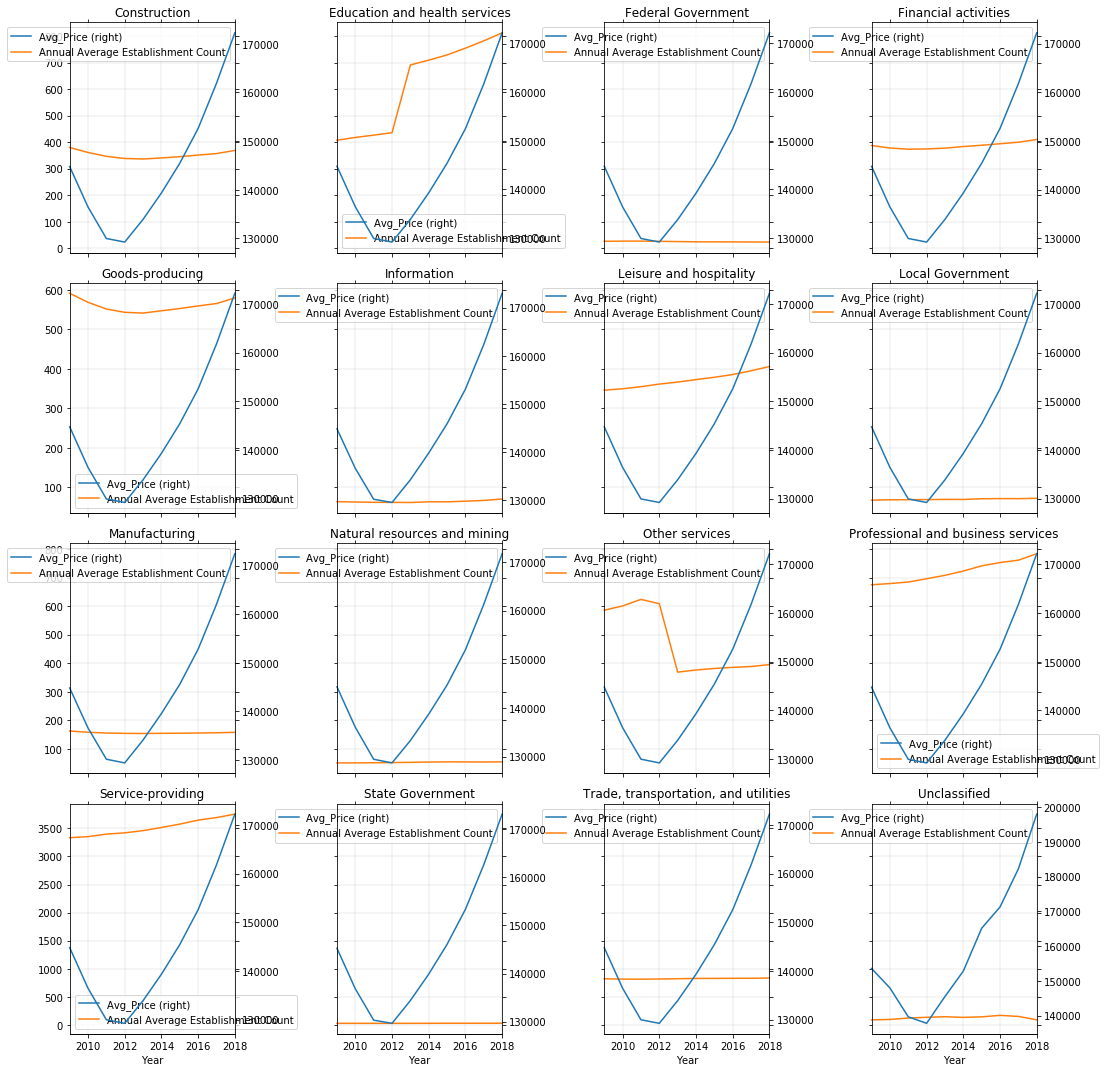

In [14]:
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True, sharey='row', figsize=(15,15))
axes_list = [item for sublist in axes for item in sublist] 

for industry, selection in industry_avg.groupby("Industry"):
    ax = axes_list.pop(0)
    selection.plot(x='Year', y='Avg_Price', ax=ax, clip_on=False, secondary_y=True)
    selection.plot(x='Year', y='Annual Average Establishment Count', ax=ax, clip_on=False)
    ax.set_title(industry)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.grid(linewidth=0.25)
    ax.set_xlim((2009, 2018))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

for ax in axes_list:
    ax.remove()

plt.tight_layout()
plt.savefig("Charts/Images/Price_Estb_by_Industry.png")
plt.show()

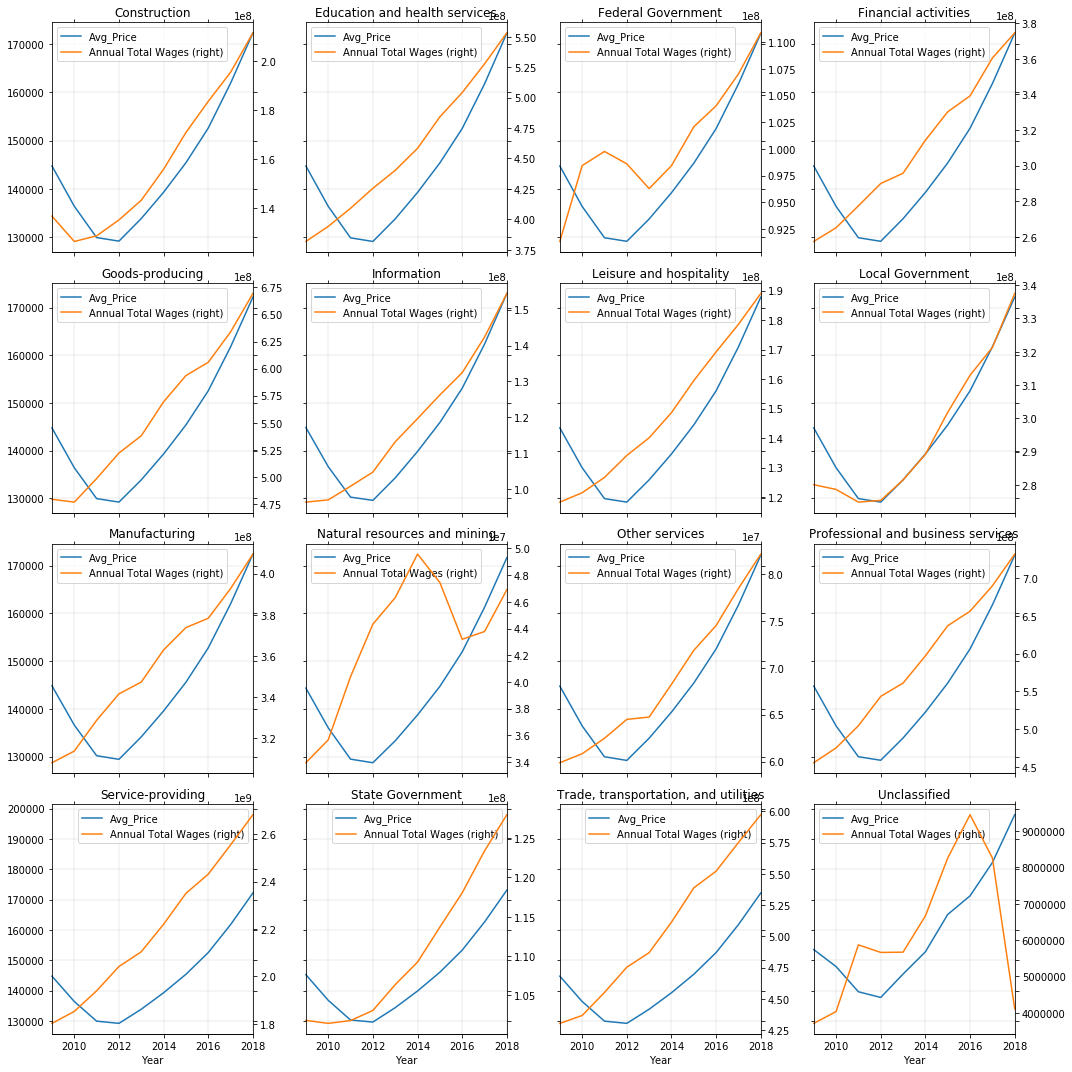

In [15]:
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True, sharey='row', figsize=(15,15))
axes_list = [item for sublist in axes for item in sublist] 

for industry, selection in industry_avg.groupby("Industry"):
    ax = axes_list.pop(0)
    selection.plot(x='Year', y='Avg_Price', ax=ax, clip_on=False)
    selection.plot(x='Year', y='Annual Total Wages', ax=ax, clip_on=False, secondary_y=True)
    ax.set_title(industry)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.grid(linewidth=0.25)
    ax.set_xlim((2009, 2018))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

for ax in axes_list:
    ax.remove()

plt.tight_layout()
plt.savefig("Charts/Images/Price_Wages_by_Industry.png")
plt.show()

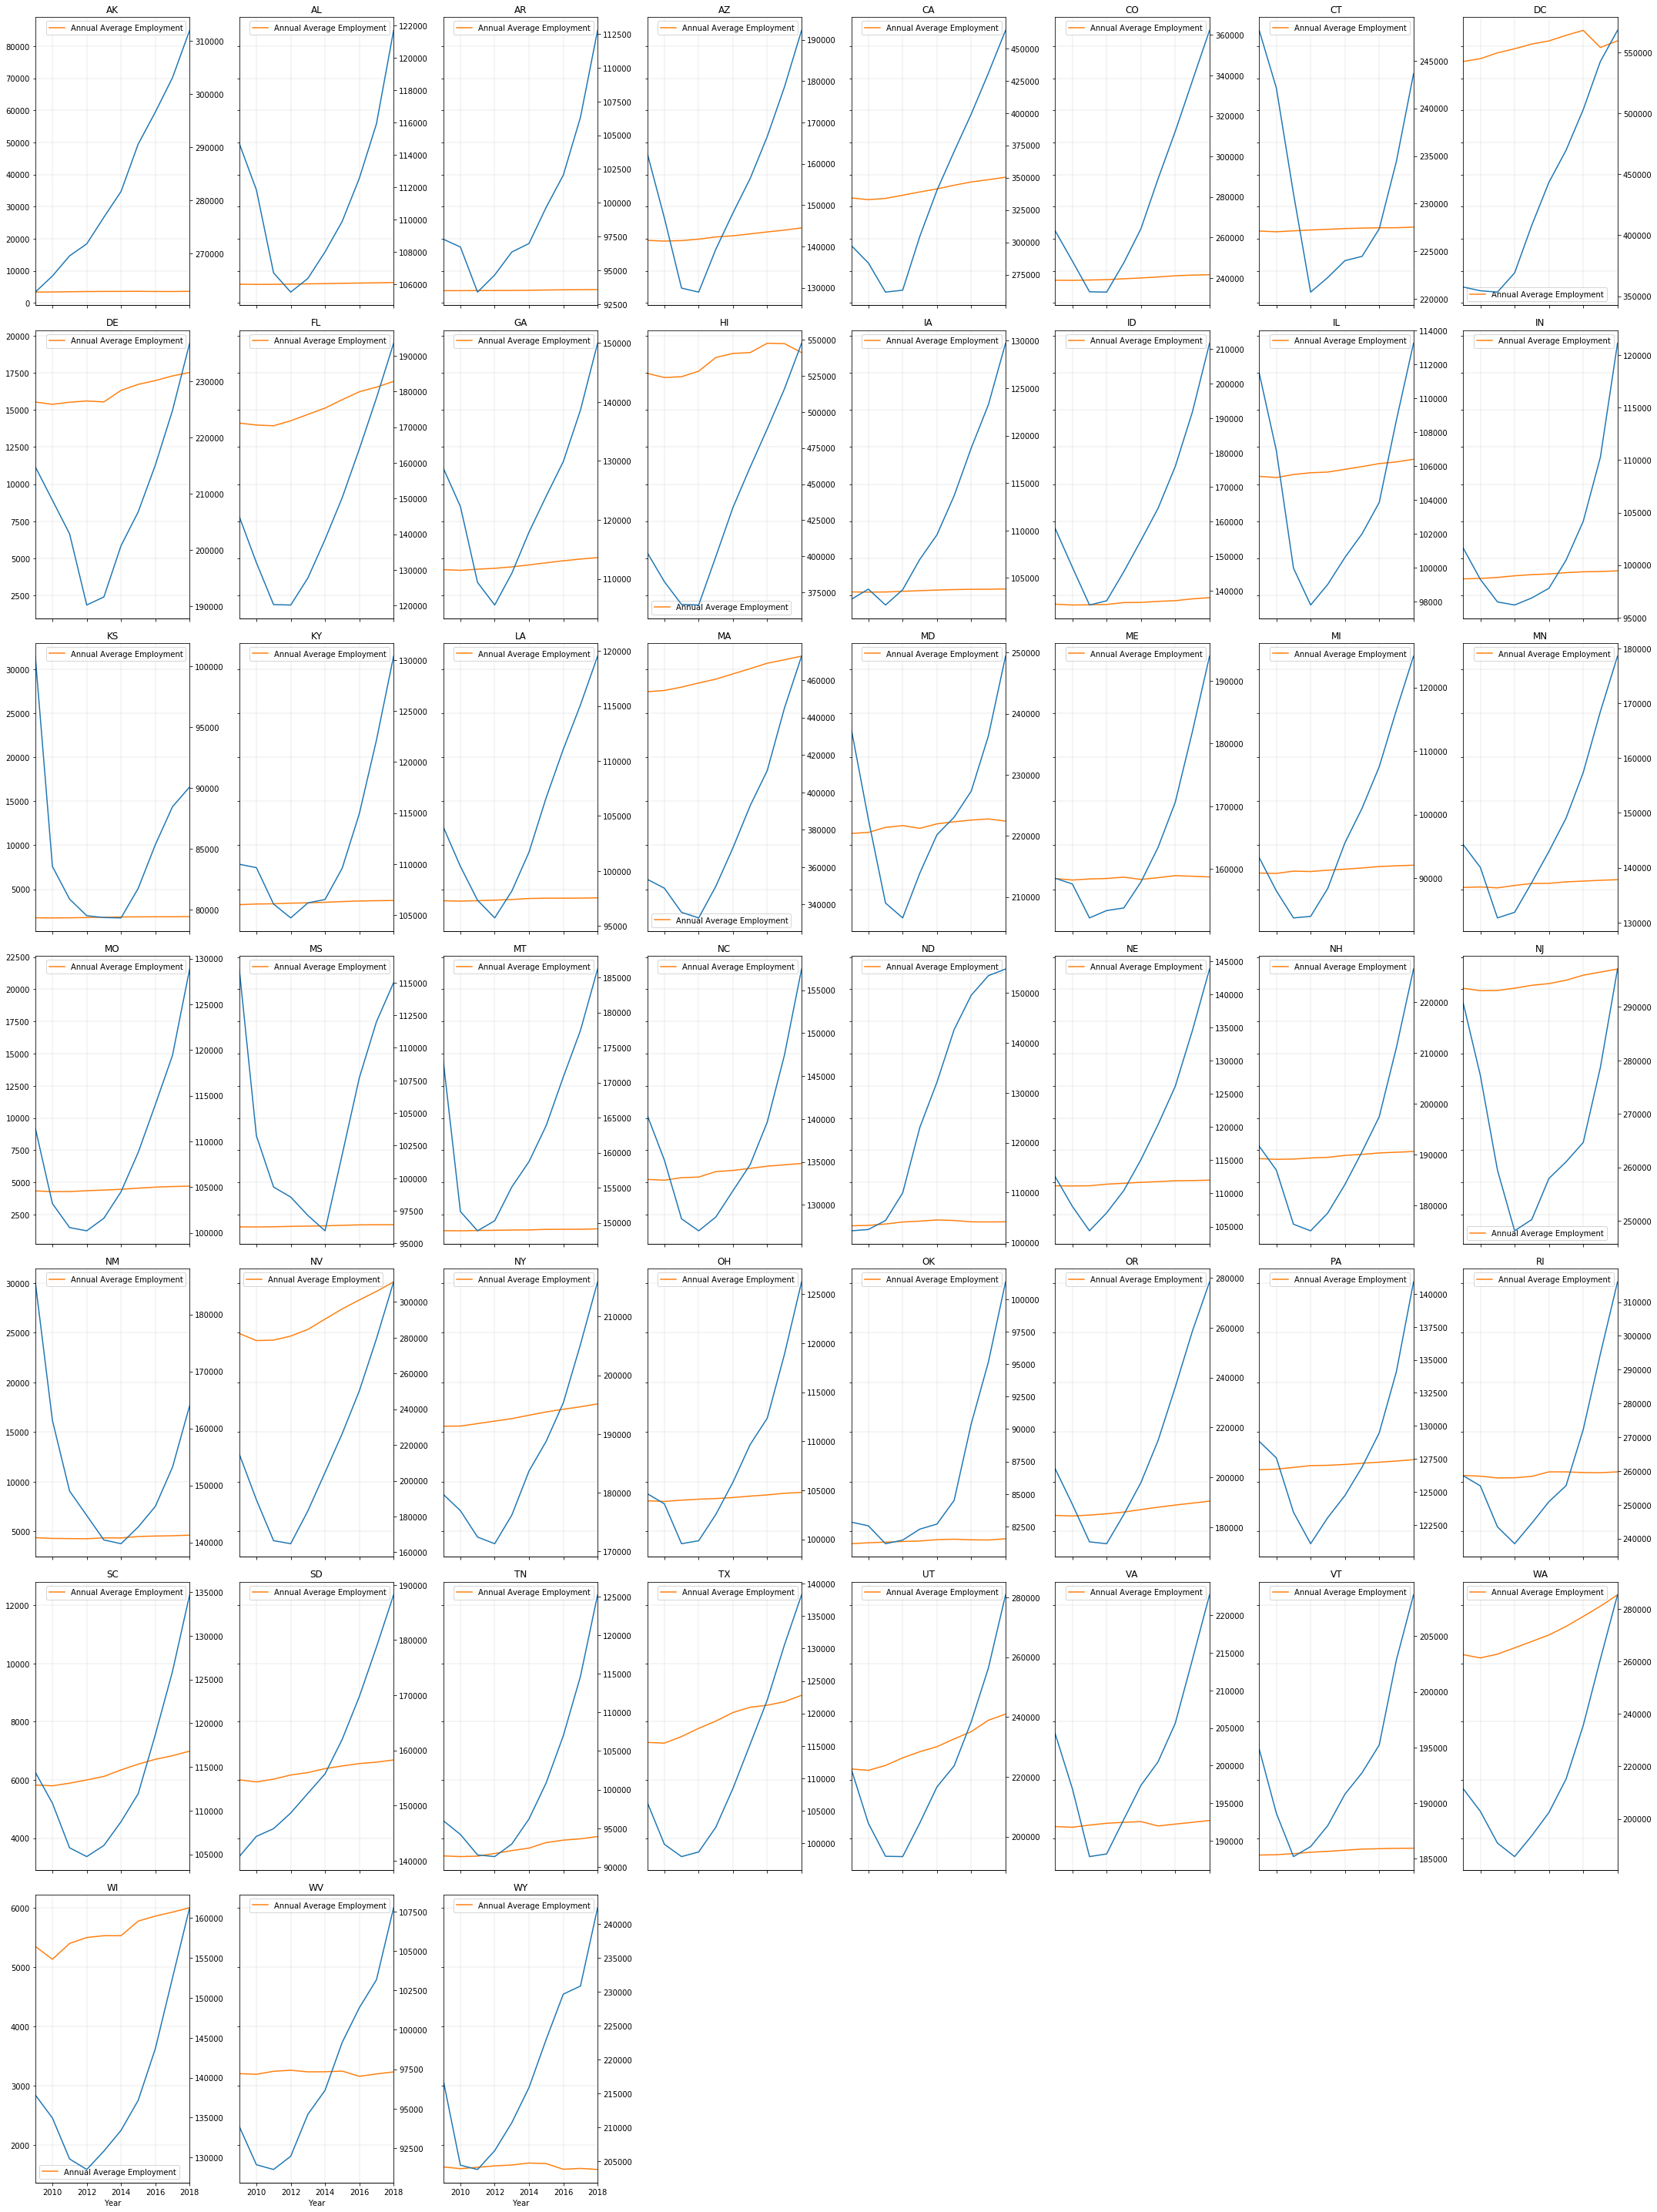

In [16]:
fig, axes = plt.subplots(nrows=7, ncols=8, sharex=True, sharey='row', figsize=(30,40))
axes_list = [item for sublist in axes for item in sublist] 

for state, selection in state_avg.groupby("State"):
    try:
        ax = axes_list.pop(0)
    except:
        pass
    selection.plot(x='Year', y='Avg_Price',label = 'Avg_Price', legend=False, ax=ax, secondary_y=True)
    selection.plot(x='Year', y='Annual Average Employment', ax=ax)
    ax.set_title(state)
#     ax.tick_params(
#         which='both',
#         bottom='off',
#         left='off',
#         right='off',
#         top='off'
#     )
    ax.grid(linewidth=0.25)
    ax.set_xlim((2009, 2018))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

for ax in axes_list:
    ax.remove()
#plt.legend(lines[:2],['Average Home Price','Annual Average Pay'])
plt.tight_layout()
plt.savefig("Charts/Images/Price_Emp_by_State.png")
plt.show()

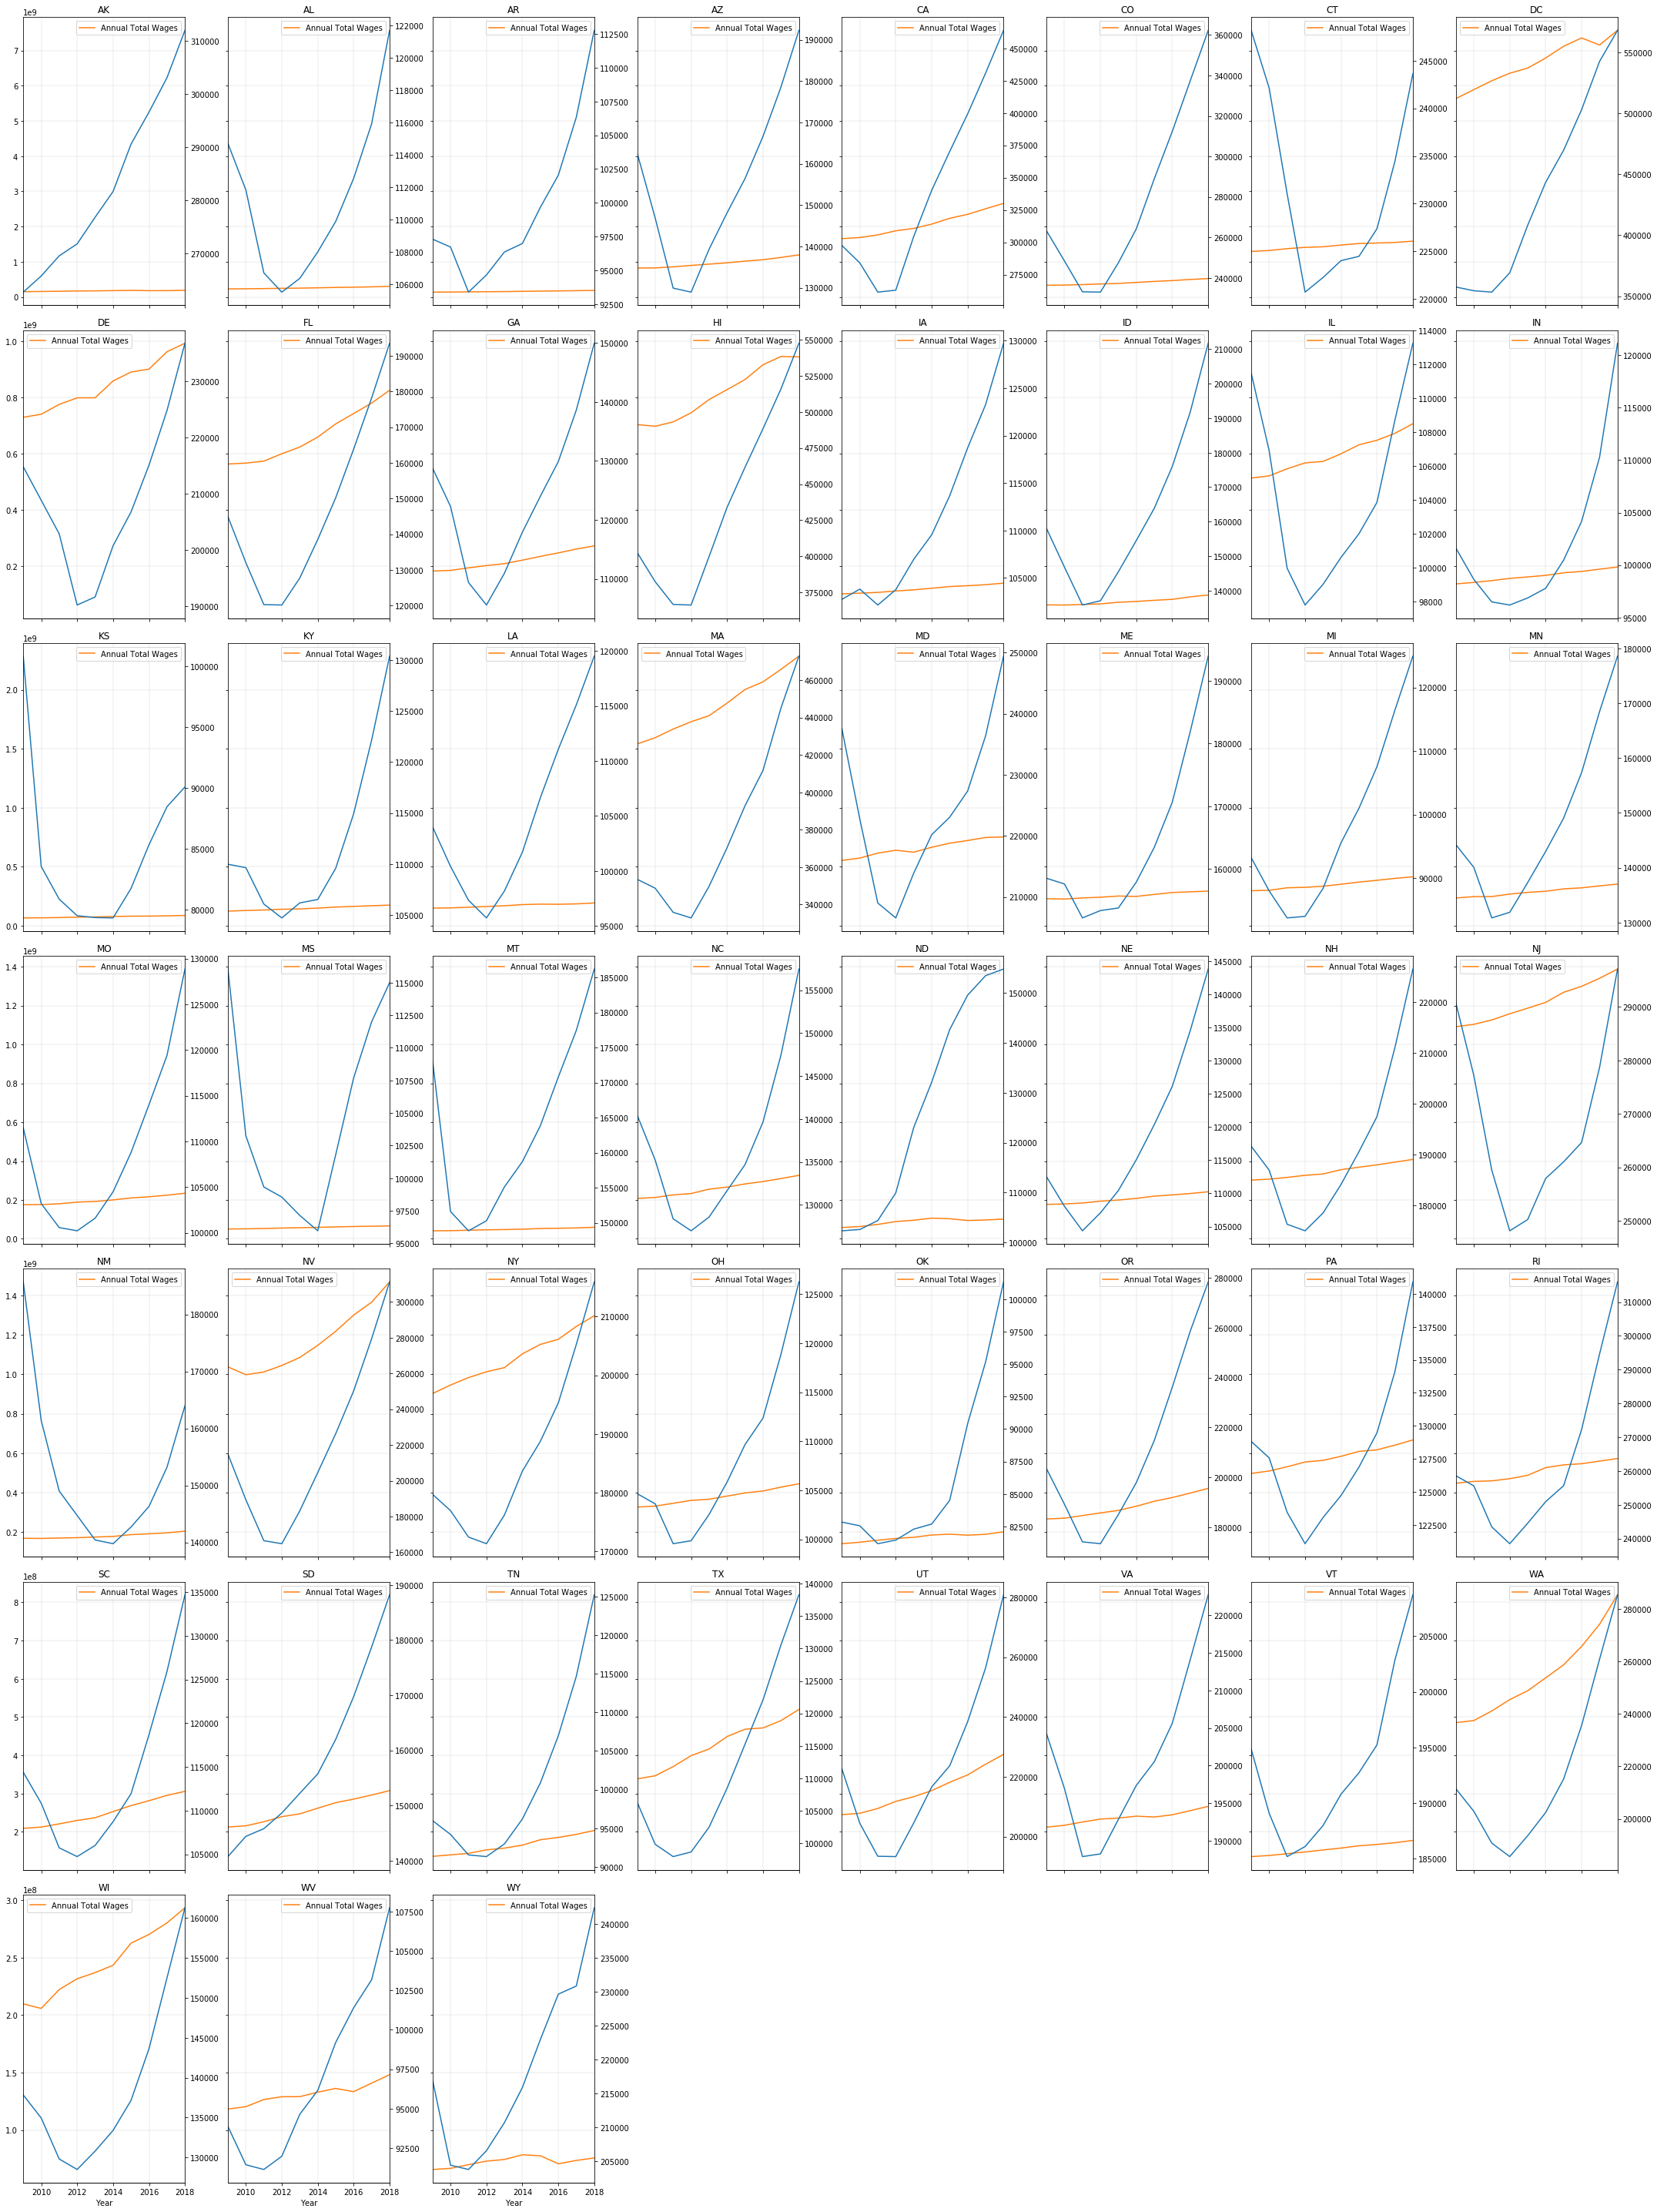

In [17]:
fig, axes = plt.subplots(nrows=7, ncols=8, sharex=True, sharey='row', figsize=(30,40))
axes_list = [item for sublist in axes for item in sublist] 

for state, selection in state_avg.groupby("State"):
    try:
        ax = axes_list.pop(0)
    except:
        pass
    selection.plot(x='Year', y='Avg_Price',label = 'Avg_Price', legend=False, ax=ax, secondary_y=True)
    selection.plot(x='Year', y='Annual Total Wages', ax=ax)
    ax.set_title(state)
#     ax.tick_params(
#         which='both',
#         bottom='off',
#         left='off',
#         right='off',
#         top='off'
#     )
    ax.grid(linewidth=0.25)
    ax.set_xlim((2009, 2018))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

for ax in axes_list:
    ax.remove()
#plt.legend(lines[:2],['Average Home Price','Annual Average Pay'])
plt.tight_layout()
plt.savefig("Charts/Images/Price_Wage_by_State.png")
plt.show()

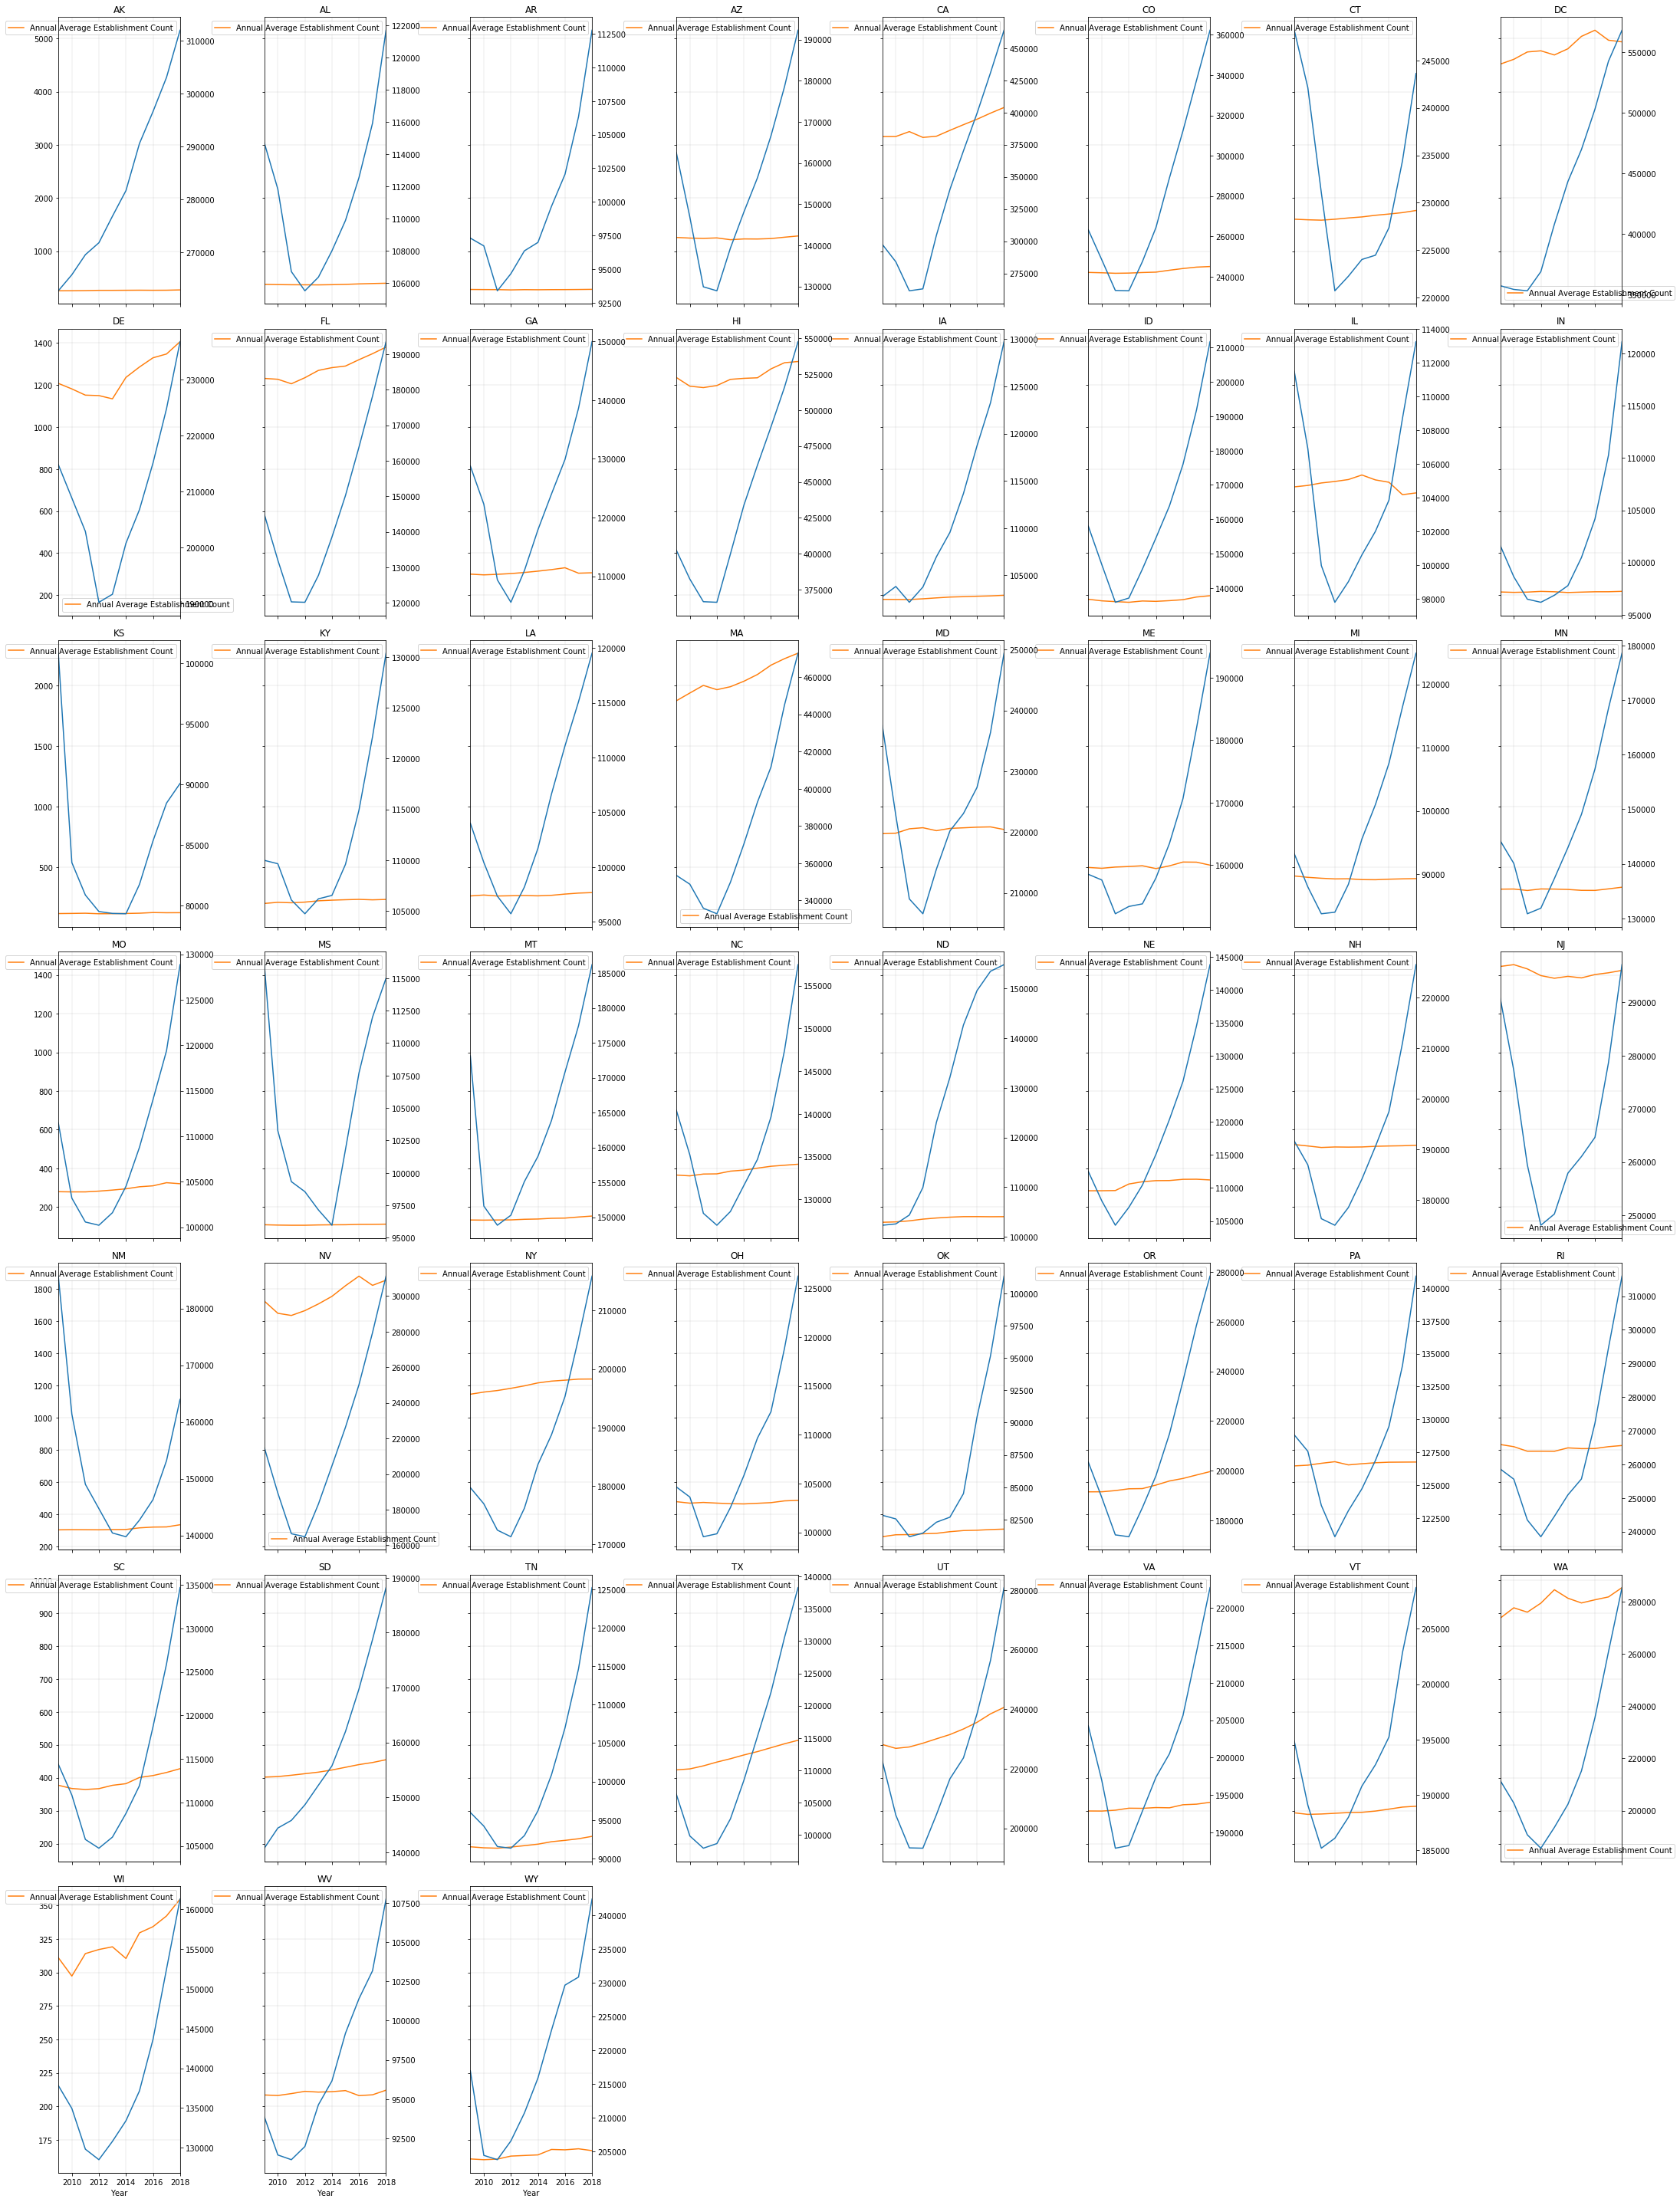

In [18]:
fig, axes = plt.subplots(nrows=7, ncols=8, sharex=True, sharey='row', figsize=(30,40))
axes_list = [item for sublist in axes for item in sublist] 

for state, selection in state_avg.groupby("State"):
    try:
        ax = axes_list.pop(0)
    except:
        pass
    selection.plot(x='Year', y='Avg_Price',label = 'Avg_Price', legend=False, ax=ax, secondary_y=True)
    selection.plot(x='Year', y='Annual Average Establishment Count', ax=ax)
    ax.set_title(state)
#     ax.tick_params(
#         which='both',
#         bottom='off',
#         left='off',
#         right='off',
#         top='off'
#     )
    ax.grid(linewidth=0.25)
    ax.set_xlim((2009, 2018))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

for ax in axes_list:
    ax.remove()
#plt.legend(lines[:2],['Average Home Price','Annual Average Pay'])
plt.tight_layout()
plt.savefig("Charts/Images/Price_Estb_by_State.png")
plt.show()